In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np

Using TensorFlow backend.
/home/jorgelm/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jorgelm/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jorgelm/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jorgelm/.local/lib/python3.6/site-packages/tensorflow/py

In [1]:
import cv2
from PIL import Image
import numpy as np
import glob

gt_array = []
ground_truth = glob.glob('../input-ignore/project-b-images/*.png')
for e in ground_truth:
    im = Image.open(e)
    rgb_im = im.convert('RGB')
    np_im = np.array(rgb_im)
    gt_array.append(np_im)

gt_array

AttributeError: 'list' object has no attribute 'tolist'

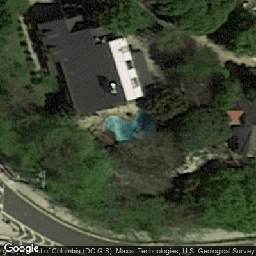

In [31]:
new_im = Image.fromarray(gt_array[25])
new_im

In [23]:
import numpy as np
import colorsys

rgb_to_hsv = np.vectorize(colorsys.rgb_to_hsv)
hsv_to_rgb = np.vectorize(colorsys.hsv_to_rgb)

def shift_hue(arr, hout):
    r, g, b, a = np.rollaxis(arr, axis=-1)
    h, s, v = rgb_to_hsv(r, g, b)
    h = hout
    r, g, b = hsv_to_rgb(h, s, v)
    arr = np.dstack((r, g, b, a))
    return arr

def colorize(image, hue):
    """
    Colorize PIL image `original` with the given
    `hue` (hue within 0-360); returns another PIL image.
    """
    img = image.convert('RGBA')
    arr = np.array(np.asarray(img).astype('float'))
    new_img = Image.fromarray(shift_hue(arr, hue/360.).astype('uint8'), 'RGBA')

    return new_img


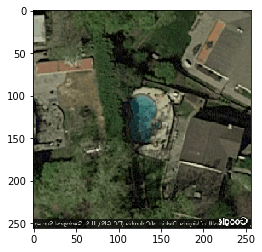

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

im = cv2.imread("../input-ignore/project-b-images/pool-20-256x256_mirror.png")

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = plt.imshow(im)
im

# hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

# im = plt.imshow(hsv)
# im

# lower_blue = np.array([110,50,50], dtype=np.uint8)
# upper_blue = np.array([130,255,255], dtype=np.uint8)
# mask = cv2.inRange(hsv, lower_blue, upper_blue)
# res = cv2.bitwise_and(im, im, mask= mask)
# im = plt.imshow(res)
# im
# mask

# res = cv2.cvtColor(res, cv2.COLOR_HSV2BGR)
# res
# plt.imshow('im')


# img = mpimg.imread('../input-ignore/project-b-images/pool-1591-256x256_mirror.png')
# imgplot = plt.imshow(img)
# imgplot

In [25]:
green = np.uint8([[[255,0,0 ]]])
hsv_blue = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print(hsv_blue)

[[[120 255 255]]]


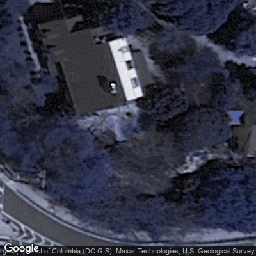

In [33]:
colorize(new_im, 230)

In [1]:
new_im

NameError: name 'new_im' is not defined

In [58]:
df = pd.DataFrame({"Pic": gt_array})
df["pool"] = 1
df["no_pool"] = 0
df

,Pic,pool,no_pool
0,"[[[88, 100, 68], [116, 116, 88], [131, 139, 11...",1,0
1,"[[[64, 80, 48], [68, 84, 52], [64, 80, 44], [7...",1,0
2,"[[[57, 73, 43], [57, 73, 43], [64, 74, 49], [7...",1,0
3,"[[[44, 72, 36], [44, 72, 36], [44, 72, 36], [4...",1,0
4,"[[[90, 90, 66], [76, 92, 60], [72, 84, 52], [5...",1,0
...,...,...,...
613,"[[[42, 65, 34], [42, 65, 34], [48, 76, 40], [5...",1,0
614,"[[[91, 91, 80], [88, 88, 76], [91, 91, 80], [1...",1,0
615,"[[[58, 57, 42], [58, 67, 50], [58, 67, 50], [5...",1,0
616,"[[[20, 34, 19], [28, 34, 24], [34, 42, 28], [1...",1,0


In [50]:
no_pool = []
no_pool_dir = glob.glob('../input-ignore/project-b-images/no-pools-dataset-256x256/*.png')
for e in no_pool_dir:
    im = Image.open(e)
    rgb_im = im.convert('RGB')
    np_im = np.array(rgb_im)
    no_pool.append(np_im)

In [53]:
df_2 = pd.DataFrame({"Pic": no_pool, "pool":0, "no_pool": 1})

In [60]:
df_3 = pd.concat([df, df_2])
df_3.to_pickle("df.pkl")